In [131]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np


df = pd.read_csv('train.csv') 
print(df.head())

print(df.describe())

print(df.info())


numerical_imputer = SimpleImputer(strategy='mean')  
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = numerical_imputer.fit_transform(train_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object']).columns
train_df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print(train_df.isnull().sum())

ohe = OneHotEncoder(sparse=False, drop='first')  
encoded_features = ohe.fit_transform(df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

df.drop(columns=categorical_columns, inplace=True)
df = pd.concat([df, encoded_features_df], axis=1)






       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      

D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [132]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

t_df = pd.read_csv('test.csv')  
print(t_df.head())

print(t_df.describe())

print(t_df.info())


numerical_imputer = SimpleImputer(strategy='mean') 
numerical_columns = t_df.select_dtypes(include=['int64', 'float64']).columns
t_df[numerical_columns] = numerical_imputer.fit_transform(t_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = t_df.select_dtypes(include=['object']).columns
t_df[categorical_columns] = categorical_imputer.fit_transform(t_df[categorical_columns])

print(t_df.isnull().sum())

ohe = OneHotEncoder(sparse=False, drop='first')  
encoded_features = ohe.fit_transform(t_df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

t_df.drop(columns=categorical_columns, inplace=True)
t_df = pd.concat([t_df, encoded_features_df], axis=1)





       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  
                  ID          Age  Work_Experience  Family_Size
count    2627.000000  2627.000000      2358.000000  2514.000000
mean   463433.918919    43.649791         2.552587     2.825378
std      2618.245698    16.967015         3.341094     1.551906
min    458989.000000    18.000000        

D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# visualization


       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      

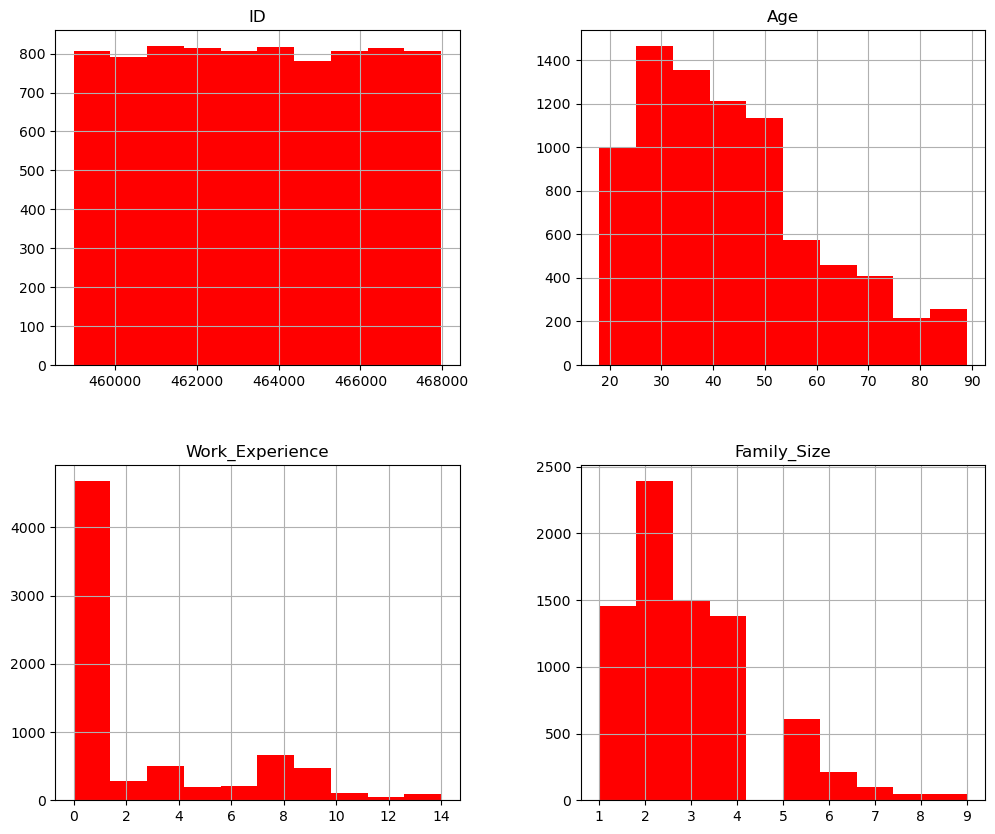

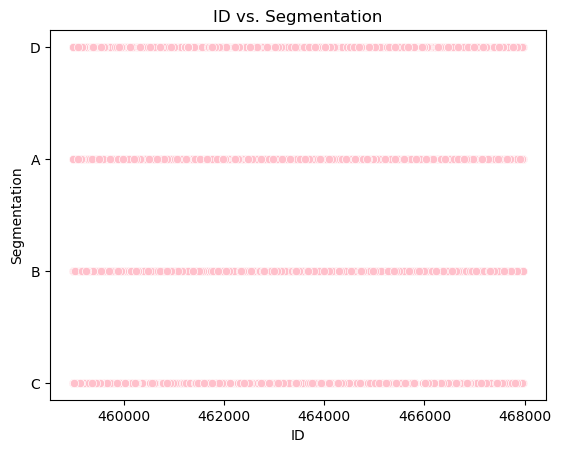

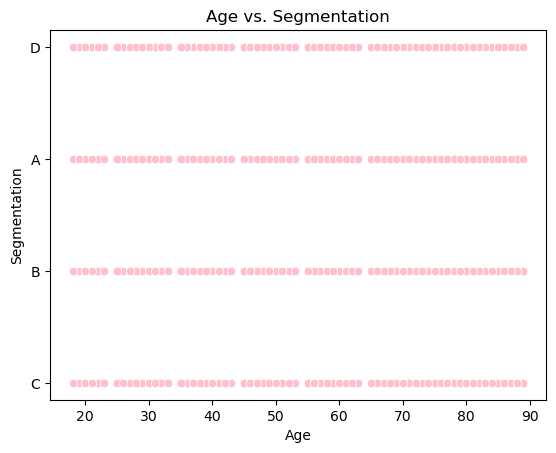

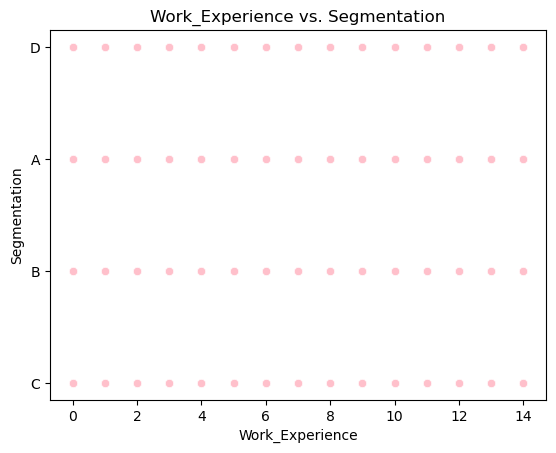

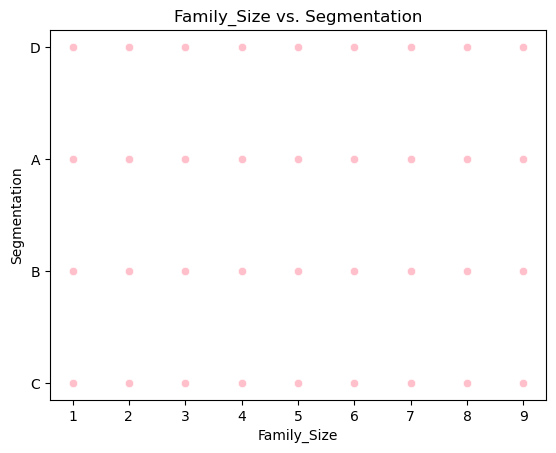

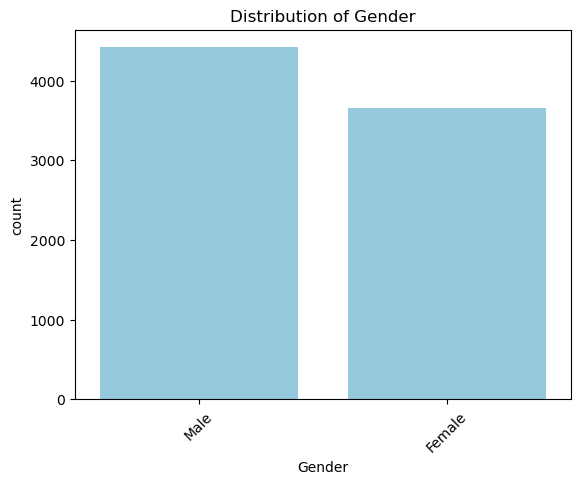

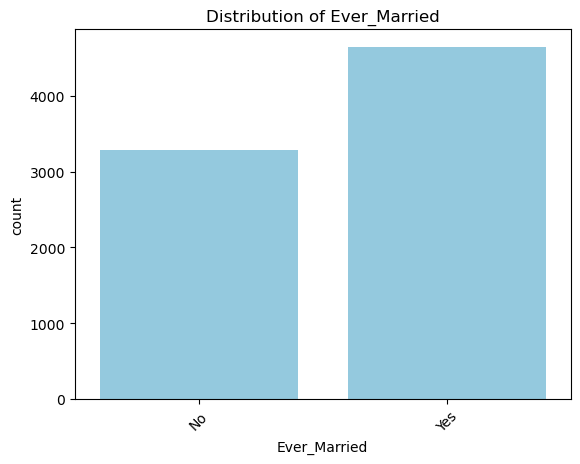

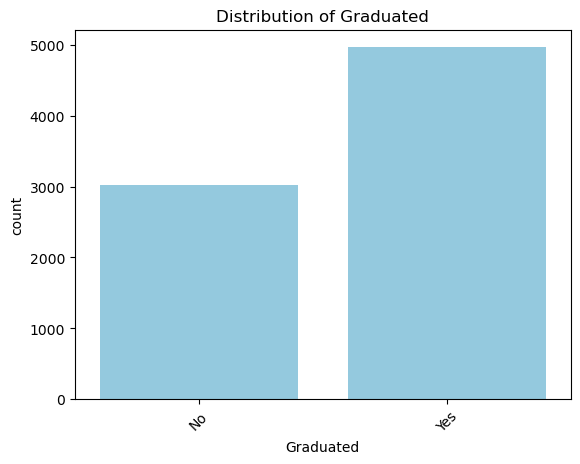

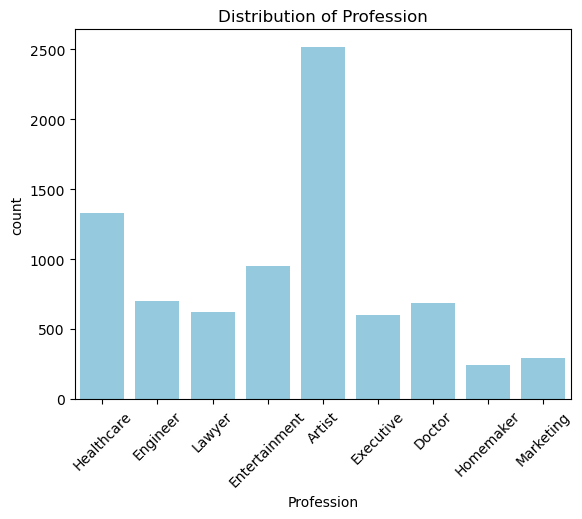

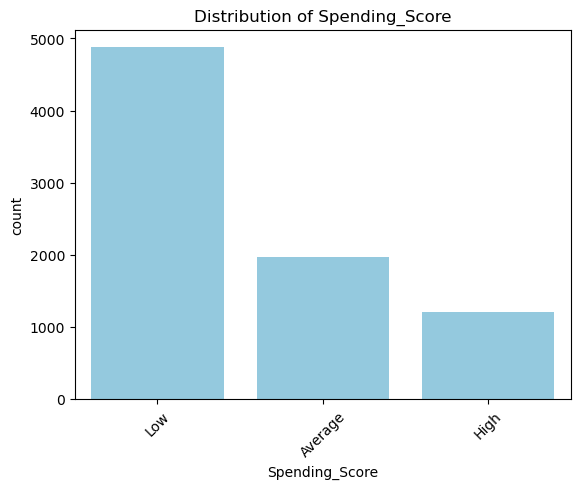

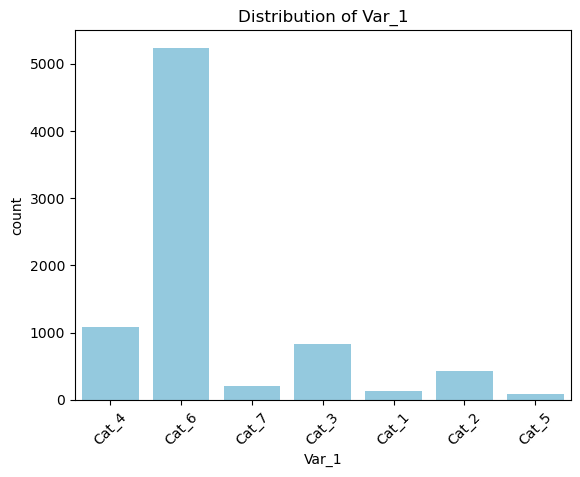

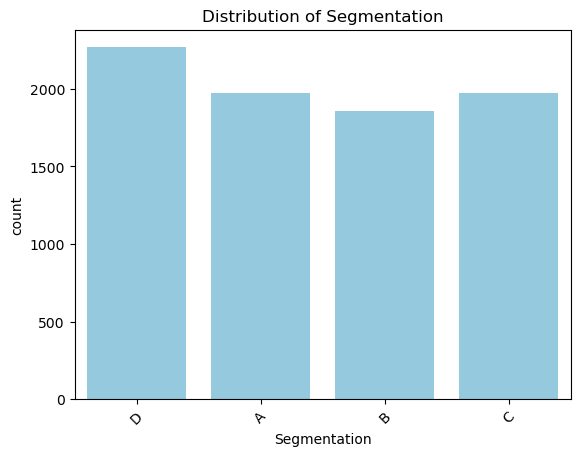

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tr_df = pd.read_csv('train.csv')

print(tr_df.head())

print(tr_df.describe())

print(tr_df.info())



tr_df.hist(figsize=(12, 10),color='red')
plt.show()

for col in tr_df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Segmentation':
        sns.scatterplot(data=tr_df, x=col, y='Segmentation',color='pink')
        plt.title(f'{col} vs. Segmentation')
        plt.show()

categorical_cols = tr_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(data=tr_df, x=col,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()






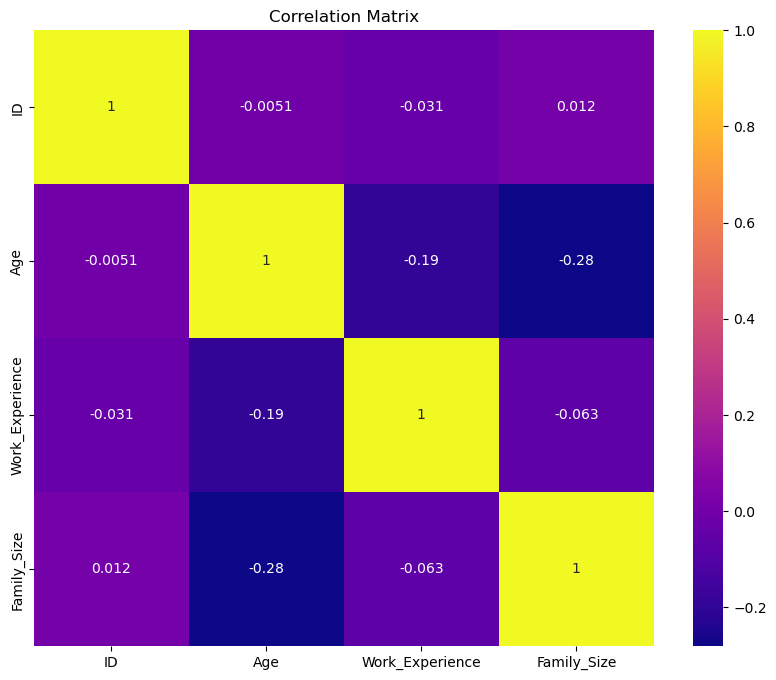

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = tr_df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()


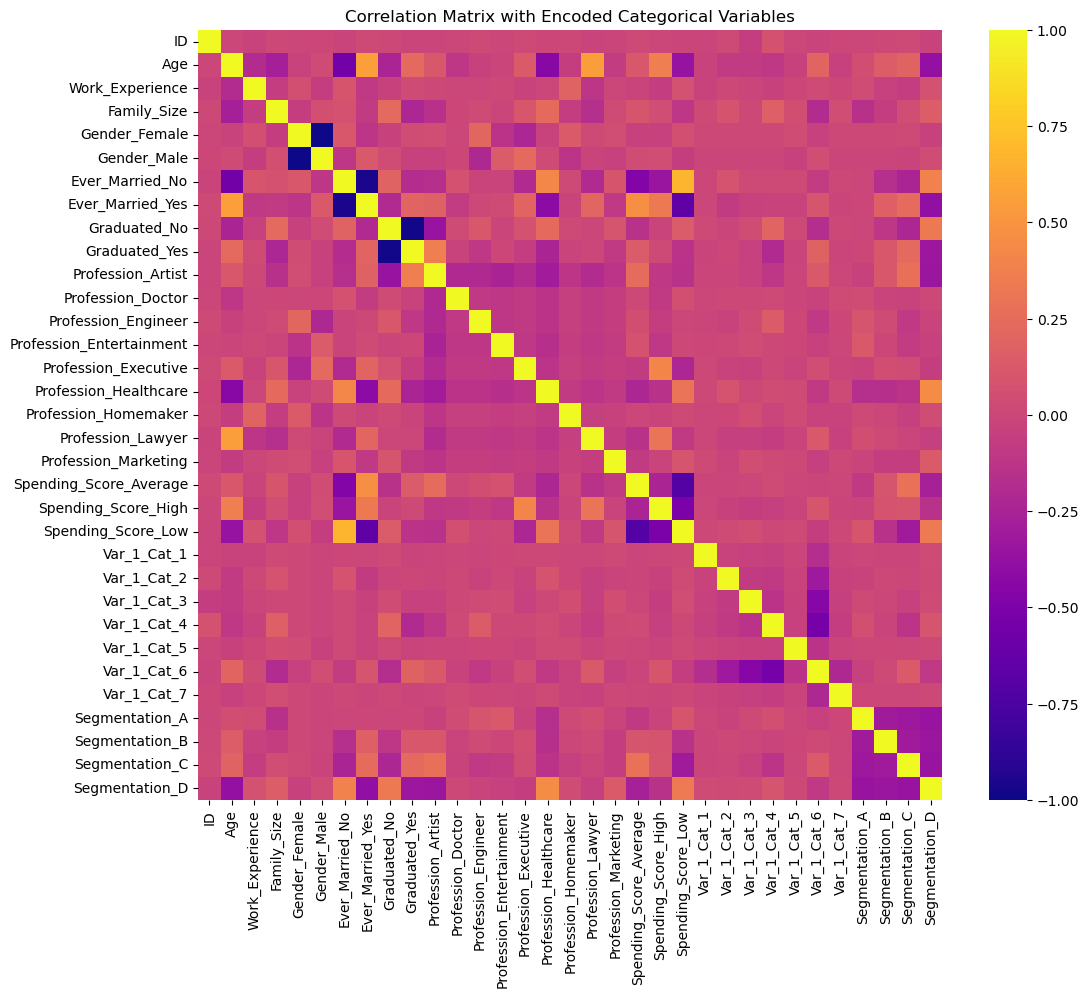

In [135]:
encoded_df = pd.get_dummies(tr_df)

corr_matrix_encoded = encoded_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_encoded, cmap='plasma')
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()


In [136]:
import numpy as np

def initialize_parameters(n_x, n_h, n_y):
  
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def relu(Z):#activation functions
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def forward_propagation(X, parameters):
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y):
    
    
    m = Y.shape[1]
    cost = -np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2)) / m
    cost = np.squeeze(cost)
    
    return cost

def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA, Z):
    s = sigmoid(Z)
    dZ = dA * s * (1-s)
    return dZ

def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return grads

def update_parameters(parameters, grads, learning_rate = 1.2):
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters


In [137]:
def model(X, Y, n_h, num_iterations=10000, learning_rate=0.01, activation="relu"):
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return parameters


In [138]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters) 
    predictions1 = (A2 > 0.5)  
    return predictions1


def accuracy_cal(predictions, Y):
    accuracy = np.mean(predictions == Y) * 100
    return accuracy

In [139]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

tr_df = pd.read_csv('train.csv')  
print(tr_df.head())

print(tr_df.describe())

print(tr_df.info())


numerical_imputer = SimpleImputer(strategy='mean')  
numerical_columns = tr_df.select_dtypes(include=['int64', 'float64']).columns
tr_df[numerical_columns] = numerical_imputer.fit_transform(tr_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = tr_df.select_dtypes(include=['object']).columns
tr_df[categorical_columns] = categorical_imputer.fit_transform(tr_df[categorical_columns])

print(tr_df.isnull().sum())

ohe = OneHotEncoder(sparse=False, drop='first')  # 'drop' avoids multicollinearity issues
encoded_features = ohe.fit_transform(tr_df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

tr_df.drop(columns=categorical_columns, inplace=True)
tr_df = pd.concat([tr_df, encoded_features_df], axis=1)

t_df = pd.read_csv('test.csv')

print(t_df.head())

print(t_df.describe())

print(t_df.info())

all_missing_columns = t_df.columns[t_df.isnull().all()].tolist()
print(f"Columns with all missing values: {all_missing_columns}")

numerical_imputer = SimpleImputer(strategy='mean') 
numerical_columns = t_df.select_dtypes(include=['int64', 'float64']).columns.difference(all_missing_columns) 
t_df[numerical_columns] = numerical_imputer.fit_transform(t_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = t_df.select_dtypes(include=['object']).columns.difference(all_missing_columns) 
t_df[categorical_columns] = categorical_imputer.fit_transform(t_df[categorical_columns])

print(t_df.isnull().sum())

ohe = OneHotEncoder(sparse=False, drop='first')  
encoded_features = ohe.fit_transform(t_df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

t_df.drop(columns=categorical_columns, inplace=True)
t_df = pd.concat([t_df, encoded_features_df], axis=1)


X_train = tr_df.iloc[:, :-1].values.T  
Y_train = tr_df.iloc[:, -1].values.reshape(1, -1)  

X_test = t_df.iloc[:, :-1].values.T  # Features
Y_test = t_df.iloc[:, -1].values.reshape(1, -1)  # Labels


X_train = X_train / np.max(X_train, axis=1, keepdims=True)
X_test = X_test / np.max(X_test, axis=1, keepdims=True)


       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      

D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (25, 8068)
Shape of X_test: (22, 2627)


In [141]:

missing_columns = set(tr_df.columns) - set(t_df.columns)

for column in missing_columns:
    t_df[column] = 0

t_df = t_df[tr_df.columns]


In [142]:
X_train = tr_df.iloc[:, :-1].values.T
Y_train = tr_df.iloc[:, -1].values.reshape(1, -1)
X_test = t_df.iloc[:, :-1].values.T
Y_test = t_df.iloc[:, -1].values.reshape(1, -1)



X_train = X_train / np.max(X_train, axis=1, keepdims=True)
X_test = X_test / np.max(X_test, axis=1, keepdims=True)

C:\Users\mahes\AppData\Local\Temp\ipykernel_28080\4204226049.py:9: RuntimeWarning: invalid value encountered in divide
  X_test = X_test / np.max(X_test, axis=1, keepdims=True)


In [143]:
parameters_relu = model(X_train, Y_train, n_h=4, num_iterations=10000, learning_rate=0.01, activation="relu")


Cost after iteration 0: 0.6931187731450359
Cost after iteration 1000: 0.5914228862004687
Cost after iteration 2000: 0.5635476870932892
Cost after iteration 3000: 0.5435812372325165
Cost after iteration 4000: 0.5249281766605095
Cost after iteration 5000: 0.4935403900565471
Cost after iteration 6000: 0.4592767195700096
Cost after iteration 7000: 0.4328951367398883
Cost after iteration 8000: 0.41349815571152926
Cost after iteration 9000: 0.3995344992349912


In [144]:
parameters_sigmoid = model(X_train, Y_train, n_h=4, num_iterations=10000, learning_rate=0.01, activation="sigmoid")

Cost after iteration 0: 0.6931187731450359
Cost after iteration 1000: 0.5914228862004687
Cost after iteration 2000: 0.5635476870932892
Cost after iteration 3000: 0.5435812372325165
Cost after iteration 4000: 0.5249281766605095
Cost after iteration 5000: 0.4935403900565471
Cost after iteration 6000: 0.4592767195700096
Cost after iteration 7000: 0.4328951367398883
Cost after iteration 8000: 0.41349815571152926
Cost after iteration 9000: 0.3995344992349912


In [145]:
predictions_relu = predict(parameters_relu, X_test)

predictions_sigmoid = predict(parameters_sigmoid, X_test)
# Calculate accuracies
accuracy_relu = accuracy_cal(predictions_relu, Y_test)
accuracy_sigmoid = accuracy_cal(predictions_sigmoid, Y_test)

print(f"Accuracy with ReLU activation: {accuracy_relu}%")
print(f"Accuracy with Sigmoid activation: {accuracy_sigmoid}%")

Accuracy with ReLU activation: 100.0%
Accuracy with Sigmoid activation: 100.0%


In [146]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [147]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

train_df = pd.read_csv('train.csv')  

print(train_df.head())

print(train_df.describe())

print(train_df.info())


numerical_imputer = SimpleImputer(strategy='mean')  
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_columns] = numerical_imputer.fit_transform(train_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = train_df.select_dtypes(include=['object']).columns
train_df[categorical_columns] = categorical_imputer.fit_transform(train_df[categorical_columns])

print(train_df.isnull().sum())






ohe = OneHotEncoder(sparse=False, drop='first')  
encoded_features = ohe.fit_transform(train_df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

train_df.drop(columns=categorical_columns, inplace=True)
train_df = pd.concat([train_df, encoded_features_df], axis=1)

test_df = pd.read_csv('test.csv')

print(test_df.head())

print(test_df.describe())

print(test_df.info())

all_missing_columns = test_df.columns[test_df.isnull().all()].tolist()
print(f"Columns with all missing values: {all_missing_columns}")

numerical_imputer = SimpleImputer(strategy='mean')  
numerical_columns = test_df.select_dtypes(include=['int64', 'float64']).columns.difference(all_missing_columns)  
test_df[numerical_columns] = numerical_imputer.fit_transform(test_df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = test_df.select_dtypes(include=['object']).columns.difference(all_missing_columns)  
test_df[categorical_columns] = categorical_imputer.fit_transform(test_df[categorical_columns])

print(test_df.isnull().sum())

ohe = OneHotEncoder(sparse=False, drop='first')  
encoded_features = ohe.fit_transform(test_df[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

test_df.drop(columns=categorical_columns, inplace=True)
test_df = pd.concat([test_df, encoded_features_df], axis=1)

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  
                  ID          Age  Work_Experience  Family_Size
count    8068.000000  8068.000000      7239.000000  7733.000000
mean   463479.214551    43.466906         2.641663     2.850123
std      

D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [157]:

missing_columns = set(train_df.columns) - set(test_df.columns)

for column in missing_columns:
    test_df[column] = 0

test_df = test_df[train_df.columns]

In [158]:
X_train = train_df.iloc[:, :-1].values.T  # Feature
Y_train = train_df.iloc[:, -1].values.reshape(1, -1)  # Labels

X_test = test_df.iloc[:, :-1].values.T  # Features
Y_test = test_df.iloc[:, -1].values.reshape(1, -1)  # Labels

In [159]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.T)
X_test_scaled = scaler.transform(X_test.T)




Shape of X_train: (25, 8068)
Shape of X_test: (25, 2627)


In [160]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("Y_train shape:", Y_train.shape)


Y_train = Y_train.ravel()  
print("Corrected Y_train shape:", Y_train.shape)

X_train_scaled shape: (8068, 25)
Y_train shape: (1, 8068)
Corrected Y_train shape: (8068,)


In [161]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', solver='adam', random_state=1)

mlp.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)

In [162]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, activation='relu', solver='adam', random_state=1)

mlp2.fit(X_train_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, random_state=1)

In [163]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

neurons_range = [10, 20, 70, 100, 200]  

In [164]:
accuracies = {}

for neurons in neurons_range:
    mlp = MLPClassifier(hidden_layer_sizes=(neurons, neurons), max_iter=1000, activation='relu', solver='adam', random_state=1)
    
    mlp.fit(X_train_scaled, Y_train.ravel())
    
    predictions1 = mlp.predict(X_test_scaled)
    
    accuracy = accuracy_score(Y_test.ravel(), predictions1)
    accuracies[f"{neurons} neurons"] = accuracy
    print(f"Accuracy with {neurons} neurons in each hidden layer: {accuracy:.4f}")

Accuracy with 10 neurons in each hidden layer: 0.6669
Accuracy with 20 neurons in each hidden layer: 0.6270
Accuracy with 70 neurons in each hidden layer: 0.6662
Accuracy with 100 neurons in each hidden layer: 0.6064
Accuracy with 200 neurons in each hidden layer: 0.6513


In [167]:
accuracies2 = {}
for neurons in neurons_range:
    mlp2 = MLPClassifier(hidden_layer_sizes=(neurons, neurons, neurons), max_iter=1000, activation='relu', solver='adam', random_state=1)
    
    mlp2.fit(X_train_scaled, Y_train.ravel())
    

    predictions = mlp2.predict(X_test_scaled)

    
    accuracy2 = accuracy_score(Y_test.ravel(), predictions)
    accuracies2[f"{neurons} neurons"] = accuracy2
    print(f"Accuracy with {neurons} neurons in each hidden layer: {accuracy2:.4f}")

Accuracy with 10 neurons in each hidden layer: 0.6818
Accuracy with 20 neurons in each hidden layer: 0.6498
Accuracy with 70 neurons in each hidden layer: 0.6231
Accuracy with 100 neurons in each hidden layer: 0.6140
Accuracy with 200 neurons in each hidden layer: 0.6224


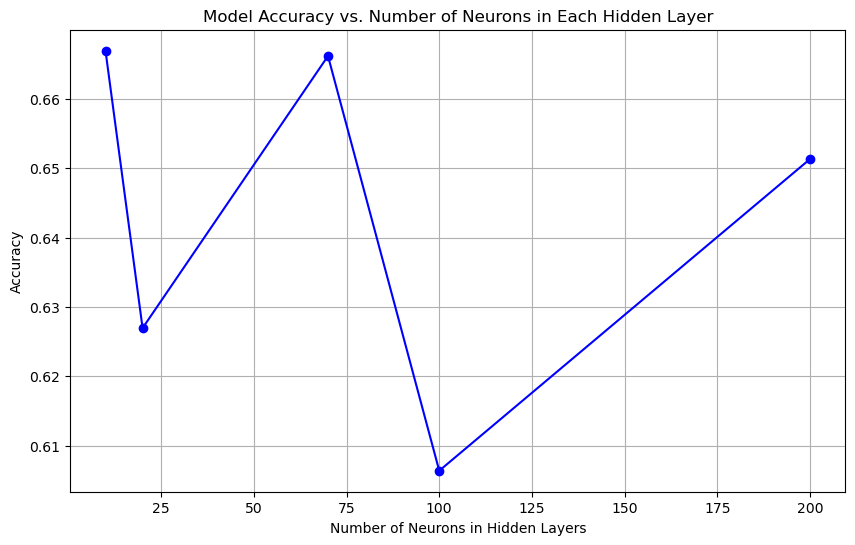

In [168]:
import matplotlib.pyplot as plt

neurons_list = list(neurons_range)
accuracy_list = [accuracies[f"{neurons} neurons"] for neurons in neurons_range]
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(neurons_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Neurons in Each Hidden Layer')
plt.xlabel('Number of Neurons in Hidden Layers')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


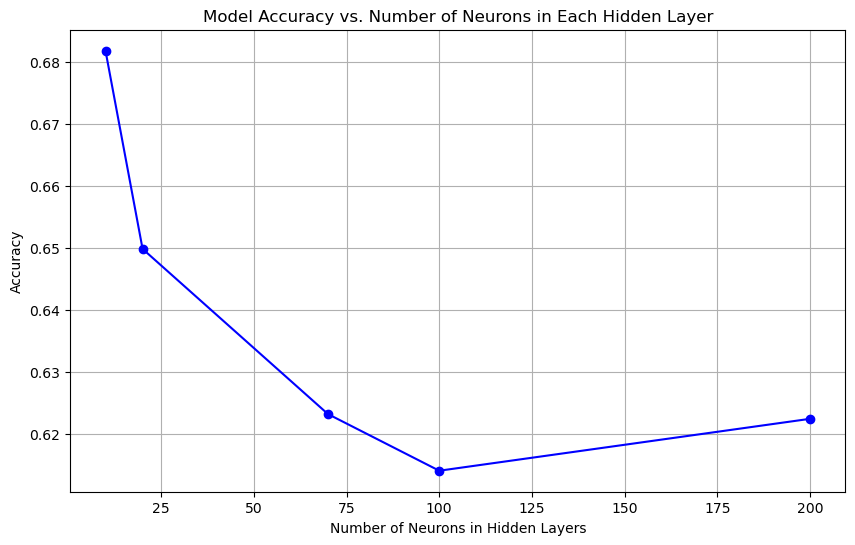

In [125]:
import matplotlib.pyplot as plt

neurons_list = list(neurons_range)
accuracy_list = [accuracies2[f"{neurons} neurons"] for neurons in neurons_range]


plt.figure(figsize=(10, 6))
plt.plot(neurons_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Neurons in Each Hidden Layer')
plt.xlabel('Number of Neurons in Hidden Layers')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=1)


log_reg.fit(X_train_scaled, Y_train.ravel())

predictions_lr = log_reg.predict(X_test_scaled)

accuracy_lr = accuracy_score(Y_test.ravel(), predictions_lr)

print(f"Logistic Regression Model Accuracy: {accuracy_lr * 100:.2f}%")

Logistic Regression Model Accuracy: 68.29%


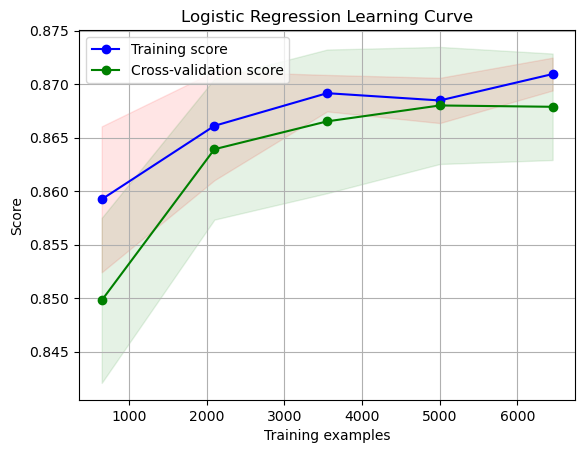

In [127]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(LogisticRegression(max_iter=1000), "Logistic Regression Learning Curve", X_train_scaled, Y_train.ravel(), cv=5, n_jobs=4)
plt.show()


In [128]:
from sklearn.metrics import confusion_matrix, classification_report

Y_test_flat = Y_test.ravel()  
print("Corrected Y_test shape:", Y_test_flat.shape)

print("Logistic Regression Model Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(Y_test_flat, predictions_lr))

print("\nClassification Report:")
print(classification_report(Y_test_flat, predictions_lr))

Corrected Y_test shape: (2627,)
Logistic Regression Model Evaluation
Confusion Matrix:
[[1794  833]
 [   0    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81      2627
         1.0       0.00      0.00      0.00         0

    accuracy                           0.68      2627
   macro avg       0.50      0.34      0.41      2627
weighted avg       1.00      0.68      0.81      2627



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
print("Neural Network Model 2 layer Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(Y_test_flat, predictions1))

print("\nClassification Report:")
print(classification_report(Y_test_flat, predictions1))

Neural Network Model 2 layer Evaluation
Confusion Matrix:
[[1711  916]
 [   0    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79      2627
         1.0       0.00      0.00      0.00         0

    accuracy                           0.65      2627
   macro avg       0.50      0.33      0.39      2627
weighted avg       1.00      0.65      0.79      2627



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
print("Neural Network Model 3 layer Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(Y_test_flat, predictions))

print("\nClassification Report:")
print(classification_report(Y_test_flat, predictions))

Neural Network Model 3 layer Evaluation
Confusion Matrix:
[[1635  992]
 [   0    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77      2627
         1.0       0.00      0.00      0.00         0

    accuracy                           0.62      2627
   macro avg       0.50      0.31      0.38      2627
weighted avg       1.00      0.62      0.77      2627



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
